In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [110]:
df = pd.read_csv("HR_comma_sep.csv")

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Data Exploration and Visulaization

In [111]:
left = df[df.left == 1]

left.shape

(3571, 10)

In [79]:
left = df[df.left == 0]

left.shape

(11428, 10)

**Averge all columns**

In [80]:
df.groupby("left").mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


From above table we can draw following conclusions,

**Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)<br/>
**Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)<br/>
**Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm

**Count of emp who left and retain**

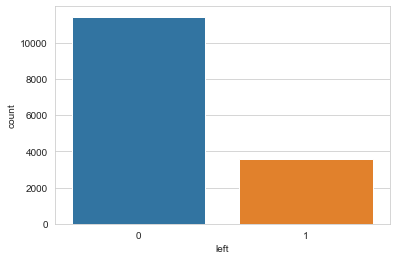

In [112]:
sns.set_style("whitegrid")
sns.countplot(df.left,data=df)

**Measure promotion vise**

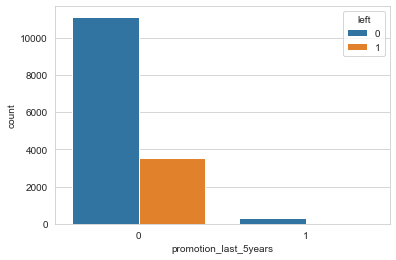

In [113]:
sns.countplot(df.promotion_last_5years,hue="left",data=df)

**Measure Department vise**

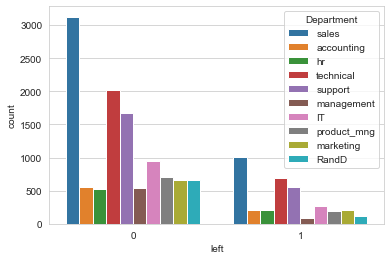

In [114]:
sns.countplot(df.left,hue="Department",data=df)

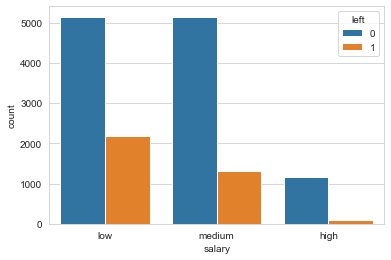

In [115]:
sns.countplot(df.salary,hue="left",data=df)

Above bar chart shows employees with high salaries are likely to not leave the company

From above chart there seem to be some impact of department on employee retention but it is not major hence we will ignore department in our analysis

From the data analysis so far we can conclude that we will use following variables as dependant variables in our model<br/>
**Satisfaction Level**<br/>
**Average Monthly Hours**<br/>
**Promotion Last 5 Years**<br/>
**Salary**

In [142]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [143]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")

salary_dummies.head()

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [144]:
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')

In [145]:
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [146]:
df_with_dummies.drop('salary',axis="columns",inplace=True)

In [125]:
#df_with_dummies.drop('salary_high',axis="columns",inplace=True)

In [147]:
X = df_with_dummies
y = df.left

In [153]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [154]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [155]:
model.fit(X_train,y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [156]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [157]:
model.score(X_test,y_test)

0.7813333333333333